In [35]:
# Import python libraries
import numpy as np
import matplotlib.pyplot as plt
import wfdb.processing

In [36]:
# Import MIT-BIH Database (Normal Sinus Rhythm)
RECORD_NUMBER = '16786'
FPATH = r'C:\Users\RaViDuRbHa\Desktop\Courses_Fall_2020\physionet_databank\16786' # Read file from local storage
DATABASE = 'nsrdb' # attribute
annot_ext = 'atr' 

In [37]:
# Read signal and annotation file
record = wfdb.rdrecord(FPATH) # wfdb(Waveform Database)
ann = wfdb.rdann(FPATH, annot_ext)
sig_len = record.__dict__['p_signal'].shape[0]  # get signal length
qrs_inds = ann.__dict__['sample']  # get indices of beat annotations
fs = record.__dict__['fs']  # get sampling frequency for current record

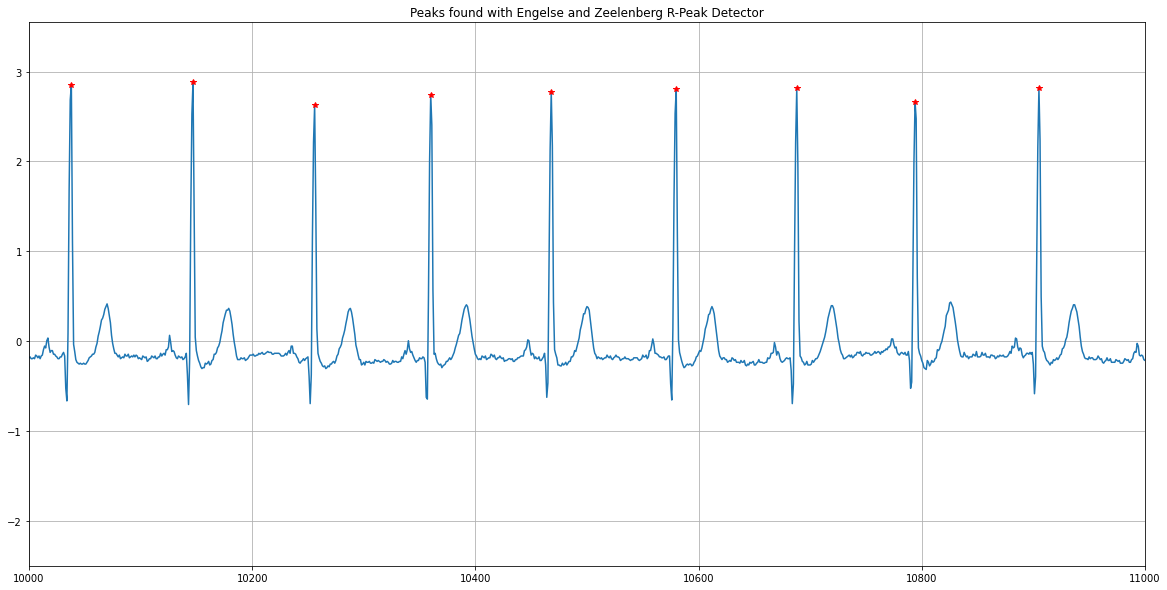

In [38]:
# Import ECG heartbeat detection algorithms (https://github.com/luishowell/ecg-detectors) 
from ecgdetectors import Detectors
detectors = Detectors(record.__dict__['fs'])
r_peaks = detectors.engzee_detector(record.__dict__['p_signal'][:, 0]) #Engelse and Zeelenberg R-Peak Detector
plt.figure(figsize=(20, 10))
plt.plot(record.__dict__['p_signal'][:, 0])  # plots actual ECG Signal
plt.plot(r_peaks, record.__dict__['p_signal'][:, 0][r_peaks], 'r*')  # Plots the peaks on ECG Signal
plt.xlim((10000, 11000))
plt.title('Peaks found with Engelse and Zeelenberg R-Peak Detector')
plt.grid(True)

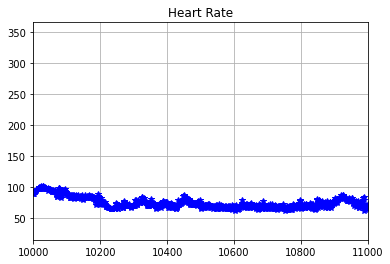

In [39]:
# Calculate Heartbeat manually
rr_s_interval = np.diff(r_peaks)  # RR interval in number of samples
rr_interval = rr_s_interval * (1/fs)  # RR interval in seconds
HR1 = 60/rr_interval  # instantaneous HR in BPM
plt.figure(2)
plt.plot(HR1, 'b-*')
plt.xlim((10000, 11000))
plt.title('Heart Rate')
plt.grid(True)
plt.show()

In [40]:
# Calculate heart rate with WFDB built-in function
HR0 = wfdb.processing.compute_hr(sig_len, qrs_inds, fs)

Text(0.5, 1.0, 'Heart rate in BPM: Built-in function. Using database reference annotations')

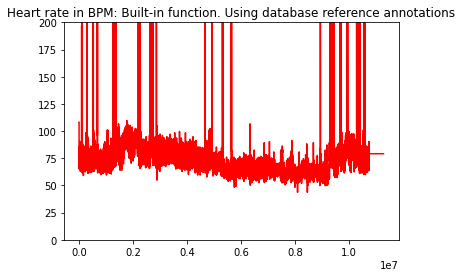

In [41]:
plt.plot(HR0,'r-')
plt.ylim((0,200))
plt.title('Heart rate in BPM: Built-in function. Using database reference annotations')